# Статистичні методи
> Індивідуальне завдання 1
> 
> Токарєв Павло, МФ-51

In [1]:
from functools import reduce
from typing import NamedTuple
Point = NamedTuple("Point", (("x", int), ("y", int)))

## Дані

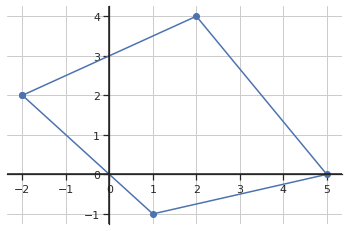

In [2]:
%matplotlib inline

points = [Point(-2, 2), Point(2,4), Point(5,0), Point(1,-1)]
#points = [Point(-7, -2), Point(-5, 5), Point(-1, -1), Point(-5, -2)]
A1, A2, A3, A4 = points


import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

fig, ax = plt.subplots()
ax.plot(*zip(*points, points[0]), '-o')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.show()

In [3]:
import sympy
x,y,c = sympy.symbols("x y c")
ws = [(f.y-s.y)*x+(s.x-f.x)*y+(f.x*s.y-s.x*f.y) 
      for f,s in zip(points, points[1:]+[points[0]])]
ws

[-2*x + 4*y - 12, 4*x + 3*y - 20, x - 4*y - 5, -3*x - 3*y]

In [4]:
f = reduce(lambda x,y: x*y, ws); f

(-3*x - 3*y)*(-2*x + 4*y - 12)*(x - 4*y - 5)*(4*x + 3*y - 20)

In [5]:
from sympy.solvers import solve
w1,w2,w3,w4=ws
sw1,sw2,sw3,sw4=map(lambda ff: solve(ff, y),ws)
e = sympy.integrate(sympy.integrate(f, (y, sw4, sw1)), (x, A1.x, A4.x))+\
sympy.integrate(sympy.integrate(f, (y, sw3, sw1)), (x, A4.x, A2.x))+\
sympy.integrate(sympy.integrate(f, (y, sw3, sw2)), (x, A2.x, A3.x))
e

1792613/30

In [6]:
c_result = 1/e
c_result

30/1792613

In [7]:
f = c_result*f
f

30*(-3*x - 3*y)*(-2*x + 4*y - 12)*(x - 4*y - 5)*(4*x + 3*y - 20)/1792613

In [8]:
g = sympy.Piecewise((0, w1>0), (0, w2 > 0), (0, w3 > 0), (0, w4 > 0), (f, True))
g

Piecewise((0, (3*x + 3*y < 0) | (4*x + 3*y - 20 > 0) | (-x + 4*y + 5 < 0) | (2*x - 4*y + 12 < 0)), (30*(-3*x - 3*y)*(-2*x + 4*y - 12)*(x - 4*y - 5)*(4*x + 3*y - 20)/1792613, True))

/home/paulra/Code/sympy/sympy/plotting/experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


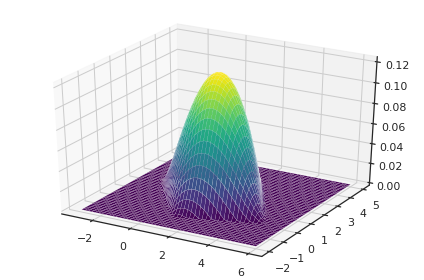

In [9]:
sympy.plotting.plot3d(g, (x, A1.x-1, A3.x+1), (y, A4.y-1, A2.y+1))

In [10]:
p1 = sympy.integrate(f, (y, sw4, sw1))
p2 = sympy.integrate(f, (y, sw3, sw1))
p3 = sympy.integrate(f, (y, sw3, sw2))
f_x  = sympy.Piecewise(
    (0, x<=A1.x),
    (p1, x<=A4.x),
    (p2, x<=A2.x),
    (p3, x<=A3.x),
    (0, True),
)
f_x

Piecewise((0, x <= -2), (864*x**5/1792613 - x**4*(1710*x/1792613 - 9090/1792613) + x**3*(-420*x**2/1792613 - 8100*x/1792613 + 11400/1792613) - x**2*(-1530*x**3/1792613 + 4590*x**2/1792613 + 4500*x/1792613 + 54000/1792613) + x*(720*x**4/1792613 - 2880*x**3/1792613 - 25200*x**2/1792613 + 108000*x/1792613) + (1710*x/1792613 - 9090/1792613)*(x/2 + 3)**4 + 864*(x/2 + 3)**5/1792613 + (x/2 + 3)**3*(-420*x**2/1792613 - 8100*x/1792613 + 11400/1792613) + (x/2 + 3)**2*(-1530*x**3/1792613 + 4590*x**2/1792613 + 4500*x/1792613 + 54000/1792613) + (x/2 + 3)*(720*x**4/1792613 - 2880*x**3/1792613 - 25200*x**2/1792613 + 108000*x/1792613), x <= 1), (-(1710*x/1792613 - 9090/1792613)*(x/4 - 5/4)**4 + (1710*x/1792613 - 9090/1792613)*(x/2 + 3)**4 - 864*(x/4 - 5/4)**5/1792613 - (x/4 - 5/4)**3*(-420*x**2/1792613 - 8100*x/1792613 + 11400/1792613) - (x/4 - 5/4)**2*(-1530*x**3/1792613 + 4590*x**2/1792613 + 4500*x/1792613 + 54000/1792613) - (x/4 - 5/4)*(720*x**4/1792613 - 2880*x**3/1792613 - 25200*x**2/1792613 + 10

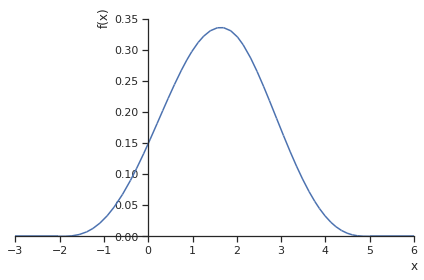

In [11]:
sympy.plotting.plot(f_x, (x, -3,6))

In [12]:
t = sympy.symbols("t")
F_x = sympy.integrate(f_x, (x, A1.x, t)).subs(t, x)
F_x

Piecewise((0, x < -2), (45625*Min(1, x)**6/458908928 - 181125*Min(1, x)**5/229454464 - 1438125*Min(1, x)**4/458908928 + 2115625*Min(1, x)**3/114727232 - 13820625*Min(1, x)**2/458908928 + 4771875*Min(1, x)/229454464 + 70543*Min(2, x)**6/774408816 - 62557*Min(2, x)**5/129068136 - 392645*Min(2, x)**4/21511356 + 7300535*Min(2, x)**3/48400551 - 7260605*Min(2, x)**2/16133517 + 1067462*Min(2, x)/1792613 - 1159171*Min(5, x)**6/12390541056 + 706477*Min(5, x)**5/2065090176 + 21434375*Min(5, x)**4/1376726784 - 504993875*Min(5, x)**3/3097635264 + 2310625625*Min(5, x)**2/4130180352 - 107171875*Min(5, x)/229454464 + 158220/1792613, True))

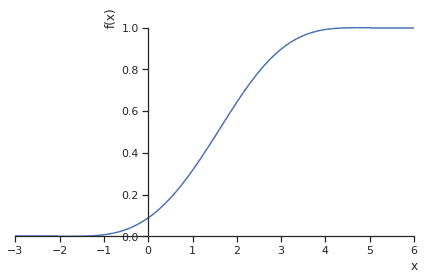

In [13]:
sympy.plotting.plot(F_x, (x, -3, 6))

In [83]:
N = 20
step = (A3.x- A1.x)/N
a = sympy.lambdify([x], F_x)
approximation_points = []
current = A1.x
while current < A3.x:
    v = float(a(current))
    approximation_points.append(Point(v, current))
    current+=step
approximation_points

[Point(x=-9.43689570931383e-16, y=-2),
 Point(x=0.0001290231030268152, y=-1.65),
 Point(x=0.001896831912723107, y=-1.2999999999999998),
 Point(x=0.008783426488741752, y=-0.9499999999999998),
 Point(x=0.025261878161097817, y=-0.5999999999999999),
 Point(x=0.05579846066871734, y=-0.2499999999999999),
 Point(x=0.10398111337615121, y=0.10000000000000009),
 Point(x=0.17177623656845759, y=0.45000000000000007),
 Point(x=0.2589138188242527, y=0.8),
 Point(x=0.36240373958446664, y=1.15),
 Point(x=0.47651715218836416, y=1.5),
 Point(x=0.593781747413646, y=1.85),
 Point(x=0.7053622072892518, y=2.2),
 Point(x=0.8024040592379205, y=2.5500000000000003),
 Point(x=0.8794647448271202, y=2.9000000000000004),
 Point(x=0.9349638781378966, y=3.2500000000000004),
 Point(x=0.9704437908537513, y=3.6000000000000005),
 Point(x=0.9896972828311392, y=3.9500000000000006),
 Point(x=0.9977715506174096, y=4.300000000000001),
 Point(x=0.9998482939161506, y=4.65)]

In [84]:
F_inv_x = sympy.interpolating_spline(1, x, *zip(*approximation_points))
F_inv_x

Piecewise((2712.69246969435*x - 1.99999999999744, (x >= -9.43689570931383e-16) & (x <= 0.000129023103026815)), (197.985210889479*x - 1.67554466626238, (x >= 0.000129023103026815) & (x <= 0.00189683191272311)), (50.82337810604*x - 1.39640340550393, (x >= 0.00189683191272311) & (x <= 0.00878342648874175)), (21.2398596032632*x - 1.13655874545646, (x >= 0.00878342648874175) & (x <= 0.0252618781610978)), (11.4616624146683*x - 0.889543119442985, (x >= 0.0252618781610978) & (x <= 0.0557984606687173)), (7.26402512798969*x - 0.655321420400707, (x >= 0.0557984606687173) & (x <= 0.103981113376151)), (5.16261323114933*x - 0.436814271705357, (x >= 0.103981113376151) & (x <= 0.171776236568458)), (4.01663657562318*x - 0.239962714623767, (x >= 0.171776236568458) & (x <= 0.258913818824253)), (3.3819718618874*x - 0.0756392499174341, (x >= 0.258913818824253) & (x <= 0.362403739584467)), (3.06712411813408*x + 0.0384627498185006, (x >= 0.362403739584467) & (x <= 0.476517152188364)), (2.98470309241763*x + 0

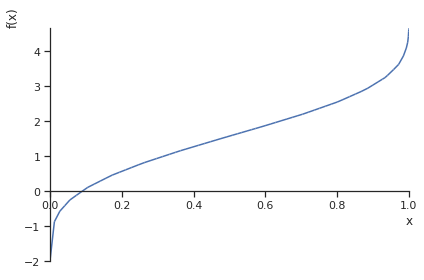

In [85]:
sympy.plotting.plot(F_inv_x, (x, 0, 1))

In [86]:
f_n = g/f_x
f_n

Piecewise((0, (3*x + 3*y < 0) | (4*x + 3*y - 20 > 0) | (-x + 4*y + 5 < 0) | (2*x - 4*y + 12 < 0)), (30*(-3*x - 3*y)*(-2*x + 4*y - 12)*(x - 4*y - 5)*(4*x + 3*y - 20)/1792613, True))*Piecewise((zoo, x <= -2), (1/(864*x**5/1792613 - x**4*(1710*x/1792613 - 9090/1792613) + x**3*(-420*x**2/1792613 - 8100*x/1792613 + 11400/1792613) - x**2*(-1530*x**3/1792613 + 4590*x**2/1792613 + 4500*x/1792613 + 54000/1792613) + x*(720*x**4/1792613 - 2880*x**3/1792613 - 25200*x**2/1792613 + 108000*x/1792613) + (1710*x/1792613 - 9090/1792613)*(x/2 + 3)**4 + 864*(x/2 + 3)**5/1792613 + (x/2 + 3)**3*(-420*x**2/1792613 - 8100*x/1792613 + 11400/1792613) + (x/2 + 3)**2*(-1530*x**3/1792613 + 4590*x**2/1792613 + 4500*x/1792613 + 54000/1792613) + (x/2 + 3)*(720*x**4/1792613 - 2880*x**3/1792613 - 25200*x**2/1792613 + 108000*x/1792613)), x <= 1), (1/(-(1710*x/1792613 - 9090/1792613)*(x/4 - 5/4)**4 + (1710*x/1792613 - 9090/1792613)*(x/2 + 3)**4 - 864*(x/4 - 5/4)**5/1792613 - (x/4 - 5/4)**3*(-420*x**2/1792613 - 8100*x/179

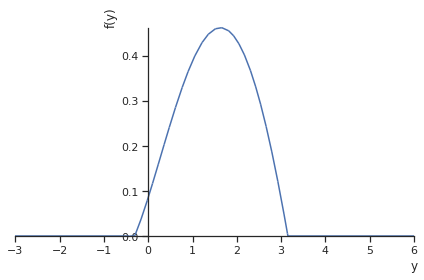

In [87]:
sympy.plotting.plot(f_n.subs(x,0.307917), (y, -3, 6))